## Install RDKIT

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys 
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import warnings
warnings.filterwarnings('ignore')

--2020-10-26 03:48:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   163MB/s    in 0.5s    

2020-10-26 03:48:28 (163 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

## Loading the libraries

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carcinogen-data/carcinogen_binary.csv
/kaggle/input/carcinogen-data/carcinogen_data_1.csv
/kaggle/input/carcinogen-data/carcinogen_all_data.csv


## Dataset Defined

In [3]:
chem_01 = pd.read_csv("/kaggle/input/carcinogen-data/carcinogen_all_data.csv")
chem_02 = pd.read_csv("/kaggle/input/carcinogen-data/carcinogen_data_1.csv")
chem_03 = pd.read_csv("/kaggle/input/carcinogen-data/carcinogen_binary.csv")

In [4]:
chem_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID_v5                         805 non-null    int64  
 1   ID_CPDBAS_Original            805 non-null    int64  
 2   STRUCTURE_Formula             805 non-null    object 
 3   STRUCTURE_MolecularWeight     805 non-null    float64
 4   TestSubstance_ChemicalName    805 non-null    object 
 5   TestSubstance_CASRN           805 non-null    object 
 6   STRUCTURE_ChemicalName_IUPAC  805 non-null    object 
 7   STRUCTURE_SMILES              805 non-null    object 
 8   TD50_Rat_mg                   803 non-null    object 
 9   TD50_Rat_mmol                 423 non-null    float64
 10  TargetSites_Rat_Male          685 non-null    object 
 11  TargetSites_Rat_Female        622 non-null    object 
 12  TargetSites_Rat_BothSexes     30 non-null     object 
 13  TD50_

In [5]:
chem_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ID_v5                                      805 non-null    int64 
 1   ID_CPDBAS_Original                         805 non-null    int64 
 2   Chemical Name                              805 non-null    object
 3     CASRN                                    805 non-null    object
 4   Carcinogenic Potency Expressed as TD50     805 non-null    object
 5   Carcinogenic Potency Expressed as P or NP  805 non-null    object
 6   Set                                        805 non-null    object
dtypes: int64(2), object(5)
memory usage: 44.1+ KB


In [6]:
chem_02_copy = chem_02.STRUCTURE_SMILES

## Concat chem_02 and chem_03 dataset for better understanding and future data wrangling

In [7]:
chem_new = pd.concat([chem_03, chem_02_copy], axis = 1)

In [8]:
chem_new.shape

(805, 8)

In [9]:
chem_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   ID_v5                                      805 non-null    int64 
 1   ID_CPDBAS_Original                         805 non-null    int64 
 2   Chemical Name                              805 non-null    object
 3     CASRN                                    805 non-null    object
 4   Carcinogenic Potency Expressed as TD50     805 non-null    object
 5   Carcinogenic Potency Expressed as P or NP  805 non-null    object
 6   Set                                        805 non-null    object
 7   STRUCTURE_SMILES                           805 non-null    object
dtypes: int64(2), object(6)
memory usage: 50.4+ KB


In [10]:
chem_new.drop([263],axis = 0, inplace = True)

## To do the chemical calculation, SMILES notations are converted to object with RDkit 

In [11]:
from rdkit import Chem
mol_lst=[]
for i in chem_new.STRUCTURE_SMILES:
    mol=Chem.MolFromSmiles(i)
    mol_lst.append(mol)

## Calculate molecular descriptor

In [12]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors



desc_lst=[i[0] for i in Descriptors._descList]
descriptor=MoleculeDescriptors.MolecularDescriptorCalculator(desc_lst)
descrs = []
for i in range(len(mol_lst)):
    descrs.append(descriptor.CalcDescriptors(mol_lst[i]))




molDes=pd.DataFrame(descrs,columns=desc_lst)
molDes.head(20)

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.805556,0.750000,8.805556,0.750000,0.355008,44.053,40.021,44.026215,18,0,...,0,0,0,0,0,0,0,0,0,0
1,7.444444,1.305556,7.444444,1.305556,0.245321,59.068,54.028,59.037114,24,0,...,0,0,0,0,0,0,0,0,0,0
2,9.222222,-0.333333,9.222222,0.333333,0.401031,59.068,54.028,59.037114,24,0,...,0,0,0,0,0,0,0,0,0,0
3,12.108549,-3.926081,12.108549,0.031517,0.830574,324.402,304.242,324.114378,120,0,...,0,1,0,0,0,0,0,0,0,1
4,10.497718,-0.574967,10.497718,0.282099,0.520945,266.282,256.202,266.047361,94,0,...,0,0,0,0,0,1,0,0,0,0
5,7.319444,1.430556,7.319444,1.430556,0.386981,41.053,38.029,41.026549,16,0,...,0,0,0,0,0,0,0,0,0,0
6,7.731481,0.685185,7.731481,0.685185,0.257226,73.095,66.039,73.052764,30,0,...,0,0,0,0,0,0,0,0,0,0
7,10.894183,-0.451852,10.894183,0.227290,0.578318,220.224,208.128,220.073559,84,0,...,0,0,0,0,0,0,0,0,0,0
8,10.856956,-0.048647,10.856956,0.048647,0.810790,211.264,198.160,211.099714,80,0,...,0,0,0,0,0,0,0,0,0,0
9,11.174805,-0.019115,11.174805,0.019115,0.673943,223.275,210.171,223.099714,84,0,...,0,0,0,0,0,0,0,0,0,0


## Heatmap regarding the correlation among the molecular descriptors

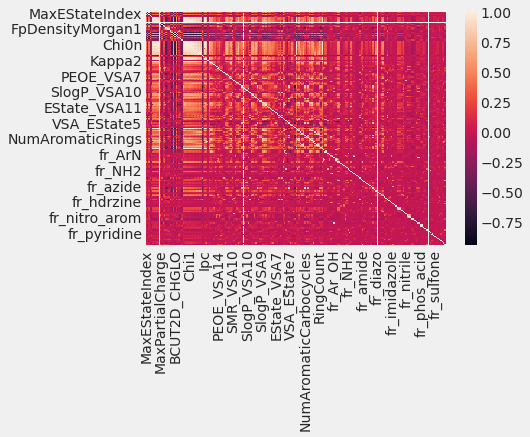

In [13]:
cor_mat = molDes.corr()
sns.heatmap(cor_mat);

## Removing the top correlated values and dropping from the dataframe

#### as highly correlated values don't gove us good result.

In [14]:
corr_feature = []
for i in range(len(cor_mat.columns)):
    for j in range(i):
        if abs(cor_mat.iloc[i,j] > 0.85): #abs is absolute
            corr_feature.append(cor_mat.columns[i])
corr_feature = list(set(corr_feature))
print(corr_feature)
len(corr_feature)

['VSA_EState6', 'Chi0v', 'fr_C_O', 'Chi2n', 'Chi0', 'Kappa2', 'NumSaturatedCarbocycles', 'fr_halogen', 'fr_phenol_noOrthoHbond', 'NumHAcceptors', 'fr_COO', 'SlogP_VSA6', 'FpDensityMorgan3', 'NOCount', 'fr_benzene', 'HeavyAtomCount', 'NumHeteroatoms', 'ExactMolWt', 'Chi4n', 'SlogP_VSA12', 'NumSaturatedRings', 'BertzCT', 'NumValenceElectrons', 'Chi0n', 'fr_Al_OH_noTert', 'FpDensityMorgan2', 'Chi1n', 'Chi1v', 'fr_Nhpyrrole', 'Chi3v', 'Chi1', 'HeavyAtomMolWt', 'fr_phos_ester', 'NumSaturatedHeterocycles', 'MaxAbsEStateIndex', 'Chi2v', 'Chi3n', 'fr_phenol', 'MolMR', 'Kappa1', 'NumRotatableBonds', 'Chi4v', 'SlogP_VSA5', 'LabuteASA', 'NumHDonors', 'fr_COO2', 'MinAbsPartialCharge', 'fr_C_O_noCOO', 'VSA_EState10', 'NumAromaticCarbocycles']


50

In [15]:
molDes.drop(columns = corr_feature, axis =1, inplace = True)
print(molDes.shape)
molDes.head()

(804, 158)


,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,8.805556,0.750000,0.750000,0.355008,44.053,0,0.116405,-0.303715,0.303715,2.000000,...,0,0,0,0,0,0,0,0,0,0
1,7.444444,1.305556,1.305556,0.245321,59.068,0,0.040444,-0.411136,0.411136,2.000000,...,0,0,0,0,0,0,0,0,0,0
2,9.222222,-0.333333,0.333333,0.401031,59.068,0,0.213790,-0.369921,0.369921,2.000000,...,0,0,0,0,0,0,0,0,0,0
3,12.108549,-3.926081,0.031517,0.830574,324.402,0,0.328410,-0.334590,0.334590,1.045455,...,0,1,0,0,0,0,0,0,0,1
4,10.497718,-0.574967,0.282099,0.520945,266.282,0,0.433056,-0.399736,0.433056,1.555556,...,0,0,0,0,0,1,0,0,0,0


## Find unique, incancers and non cancers molecules catagory

In [16]:
print(chem_new['Carcinogenic Potency Expressed as P or NP'].value_counts())
print(chem_new['Carcinogenic Potency Expressed as P or NP'].unique())

P     420
NP    384
Name: Carcinogenic Potency Expressed as P or NP, dtype: int64
['P' 'NP']


## Encoding for numerical analysis

In [17]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
chem_new['Carcinogenic Potency Expressed as P or NP'] = label_encoder.fit_transform(chem_new['Carcinogenic Potency Expressed as P or NP'])
print(chem_new['Carcinogenic Potency Expressed as P or NP'].unique())

[1 0]


In [18]:
print(chem_new['Carcinogenic Potency Expressed as P or NP'].value_counts())

1    420
0    384
Name: Carcinogenic Potency Expressed as P or NP, dtype: int64


In [19]:
chem_new

,ID_v5,ID_CPDBAS_Original,Chemical Name,CASRN,Carcinogenic Potency Expressed as TD50,Carcinogenic Potency Expressed as P or NP,Set,STRUCTURE_SMILES
0,1,2,Acetaldehyde,75-07-0,153,1,Training,CC=O
1,2,4,Acetaldehyde oxime,107-29-9,NP,0,Training,CC=NO
2,3,5,Acetamide,60-35-5,180,1,Training,CC(=O)N
3,4,7,Acetohexamide,968-81-0,NP,0,Training,O=S(=O)(C1=CC=C(C=C1)C(=O)C)NC(=O)NC2CCCCC2
4,5,8,Acetone[4-(5-nitro-2-furyl)-2-thiazolyl] hydra...,18523-69-8,6.05,1,Training,C(/C)(C)=N\NC1=NC=C(S1)C2=CC=C(O2)[N+](=O)[O-]
...,...,...,...,...,...,...,...,...
800,794,1434,"Ethene, chloro-",75-01-4,6.11,1,Test,ClC1=CC(Cl)=C(/N=N/C(C(=O)NC2=C(C=C(C3=CC(C)=C...
801,796,1439,Vinylidene fluoride,75-38-7,NP,0,Test,C1(C2=CC=C(C(=C2)Cl)N=NC(C(C)=O)C(=O)NC3=C(C=C...
802,801,1452,C.I. pigment yellow 16,5979-28-2,NP,0,Test,O=C(C3=CC=C6C2=C34)C1=CC=CC=C1C4=CC=C2C(C5=CC=...
803,802,1453,"Butanamide, 2,2'-[(3,3'-dichloro[1,1'-biphenyl...",5567-15-7,NP,0,Test,OCCNC1=C(OCCO)C=C([N+]([O-])=O)C=C1


## Feature Extraction

##### using EXTRA TREE REGRESSOR

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import ExtraTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [21]:
x = molDes
y = chem_new['Carcinogenic Potency Expressed as P or NP'] # target value

## feature selection with Extra Tree Regressor
model = ExtraTreeRegressor()
model.fit(x,y)


ExtraTreeRegressor()

### taking top 20 molecular descriptor for better prediction

In [22]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance = feat_importance.sort_values(ascending = False)
imp_feat = feat_importance.head(20)
print(type(imp_feat))
imp_feat

<class 'pandas.core.series.Series'>


MinAbsEStateIndex    0.030836
SMR_VSA5             0.029244
MolLogP              0.028294
MaxEStateIndex       0.026521
EState_VSA7          0.026485
FpDensityMorgan1     0.025079
EState_VSA5          0.023393
BalabanJ             0.021994
PEOE_VSA7            0.021380
SMR_VSA3             0.019737
PEOE_VSA11           0.019061
BCUT2D_LOGPHI        0.017991
VSA_EState7          0.017898
EState_VSA4          0.017646
EState_VSA2          0.017355
EState_VSA6          0.017331
EState_VSA8          0.017115
BCUT2D_LOGPLOW       0.016921
VSA_EState9          0.015263
Kappa3               0.015067
dtype: float64

In [23]:
molDes_feat = pd.DataFrame(imp_feat)
print(molDes_feat.index)
print(molDes_feat.shape)

Index(['MinAbsEStateIndex', 'SMR_VSA5', 'MolLogP', 'MaxEStateIndex',
       'EState_VSA7', 'FpDensityMorgan1', 'EState_VSA5', 'BalabanJ',
       'PEOE_VSA7', 'SMR_VSA3', 'PEOE_VSA11', 'BCUT2D_LOGPHI', 'VSA_EState7',
       'EState_VSA4', 'EState_VSA2', 'EState_VSA6', 'EState_VSA8',
       'BCUT2D_LOGPLOW', 'VSA_EState9', 'Kappa3'],
      dtype='object')
(20, 1)


In [24]:
mol_feature = molDes[['EState_VSA7', 'qed', 'PEOE_VSA1', 'MinAbsEStateIndex', 'EState_VSA6',
       'MinEStateIndex', 'EState_VSA2', 'BCUT2D_MRHI', 'EState_VSA1',
       'BalabanJ', 'PEOE_VSA2', 'EState_VSA10', 'VSA_EState9', 'SlogP_VSA1',
       'NumAromaticRings', 'MinPartialCharge', 'SMR_VSA5', 'BCUT2D_CHGLO',
       'PEOE_VSA3', 'SlogP_VSA2']]
mol_feature.shape

(804, 20)

## Parameter tuning and model building

### 1st use deafult logistic reg as we have to classify the cancer and noncancer molecules

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
log_reg=LogisticRegression()

In [28]:
X=mol_feature
Y=chem_new['Carcinogenic Potency Expressed as P or NP']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
log_reg=log_reg.fit(X_train,Y_train)
print("Training score: {} \nValidation score: {} ".format(round(log_reg.score(X_train, Y_train),3),
                                                          round(log_reg.score(X_test,Y_test),3)))

Training score: 0.58 
Validation score: 0.484 


## Parameter tuning with GRID SEARCH

In [29]:
from sklearn.model_selection import cross_val_score, GridSearchCV
GridSearchCV.get_params(log_reg)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
log_para = {'fit_intercept':[True],'max_iter': [100,150,200,250,300],
            'multi_class': ['auto', 'ovr', 'multinomial'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty': ['l2','l1','elasticnet','none']}
log=GridSearchCV(LogisticRegression(),param_grid=log_para).fit(X_train, Y_train).best_estimator_

In [31]:
log

LogisticRegression(max_iter=200, multi_class='multinomial', solver='sag')

In [32]:
log_reg_1 = log.fit(X_train,Y_train)
print("Training score: {} \nValidation score: {} ".format(round(log_reg_1.score(X_train, Y_train),3),round(log_reg_1.score(X_test,Y_test),3)))

Training score: 0.572 
Validation score: 0.522 


In [33]:
Y_pred = log_reg_1.predict(X_test)
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))

Mean squared error (MSE): 0.48


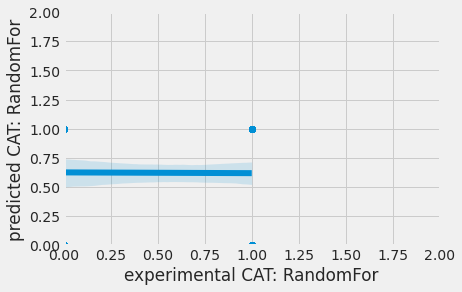

In [34]:
ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.5})
ax.set_xlabel('experimental CAT: RandomFor')
ax.set_ylabel('predicted CAT: RandomFor')
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
plt.show()

In [35]:
Y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0])

## classification_report for LOG_REG

In [39]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.39      0.38      0.38        64
           1       0.60      0.62      0.61        97

    accuracy                           0.52       161
   macro avg       0.50      0.50      0.50       161
weighted avg       0.52      0.52      0.52       161



## parameter tuning for Random Forest

In [36]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
RFECV.get_params(RandomForestRegressor)

{'bootstrap': None,
 'ccp_alpha': None,
 'criterion': None,
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': None,
 'min_impurity_split': None,
 'min_samples_leaf': None,
 'min_samples_split': None,
 'min_weight_fraction_leaf': None,
 'n_estimators': None,
 'n_jobs': None,
 'oob_score': None,
 'random_state': None,
 'verbose': None,
 'warm_start': None}

In [37]:
rf_params={'n_estimators':[90,100,200],'max_depth':[80,100,200],
           'max_features':['auto', 'sqrt', 'log2'],'oob_score':[True],'min_samples_split':[2,8,32],
            'criterion':['mse', 'mae']}
rf=GridSearchCV(RandomForestRegressor(),param_grid=rf_params).fit(X_train, Y_train).best_estimator_
rf

RandomForestRegressor(max_depth=80, max_features='log2', min_samples_split=32,
                      oob_score=True)

## fir in the RF model

In [40]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=80, max_features='log2', min_samples_split=32,
                      oob_score=True)

In [41]:
print("Training score: {} \nValidation score: {} ".format(round(rf.score(X_train, Y_train),3),round(rf.score(X_test,Y_test),3)))

Training score: 0.329 
Validation score: -0.071 


### here we can see that the score is very less, or  non acceptable so we have to a different feature selection for random forest

## Please upvote it if you like :) :) 